# 2. 分析資料

匯入資料

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

資料樣態

In [152]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [156]:
boston.data.shape

(506, 13)

練習時間

In [3]:
# import pandas as pd
# df_boston = pd.DataFrame(boston.data)
# df_boston.columns = boston.feature_names
# df_boston['PRICE'] = boston.target

In [1]:
import pandas as pd
df_boston = pd.read_excel('boston.xlsx')

In [2]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
# df_boston.to_excel("boston.xlsx", index=False)

描述性統計

In [4]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


資料視覺化

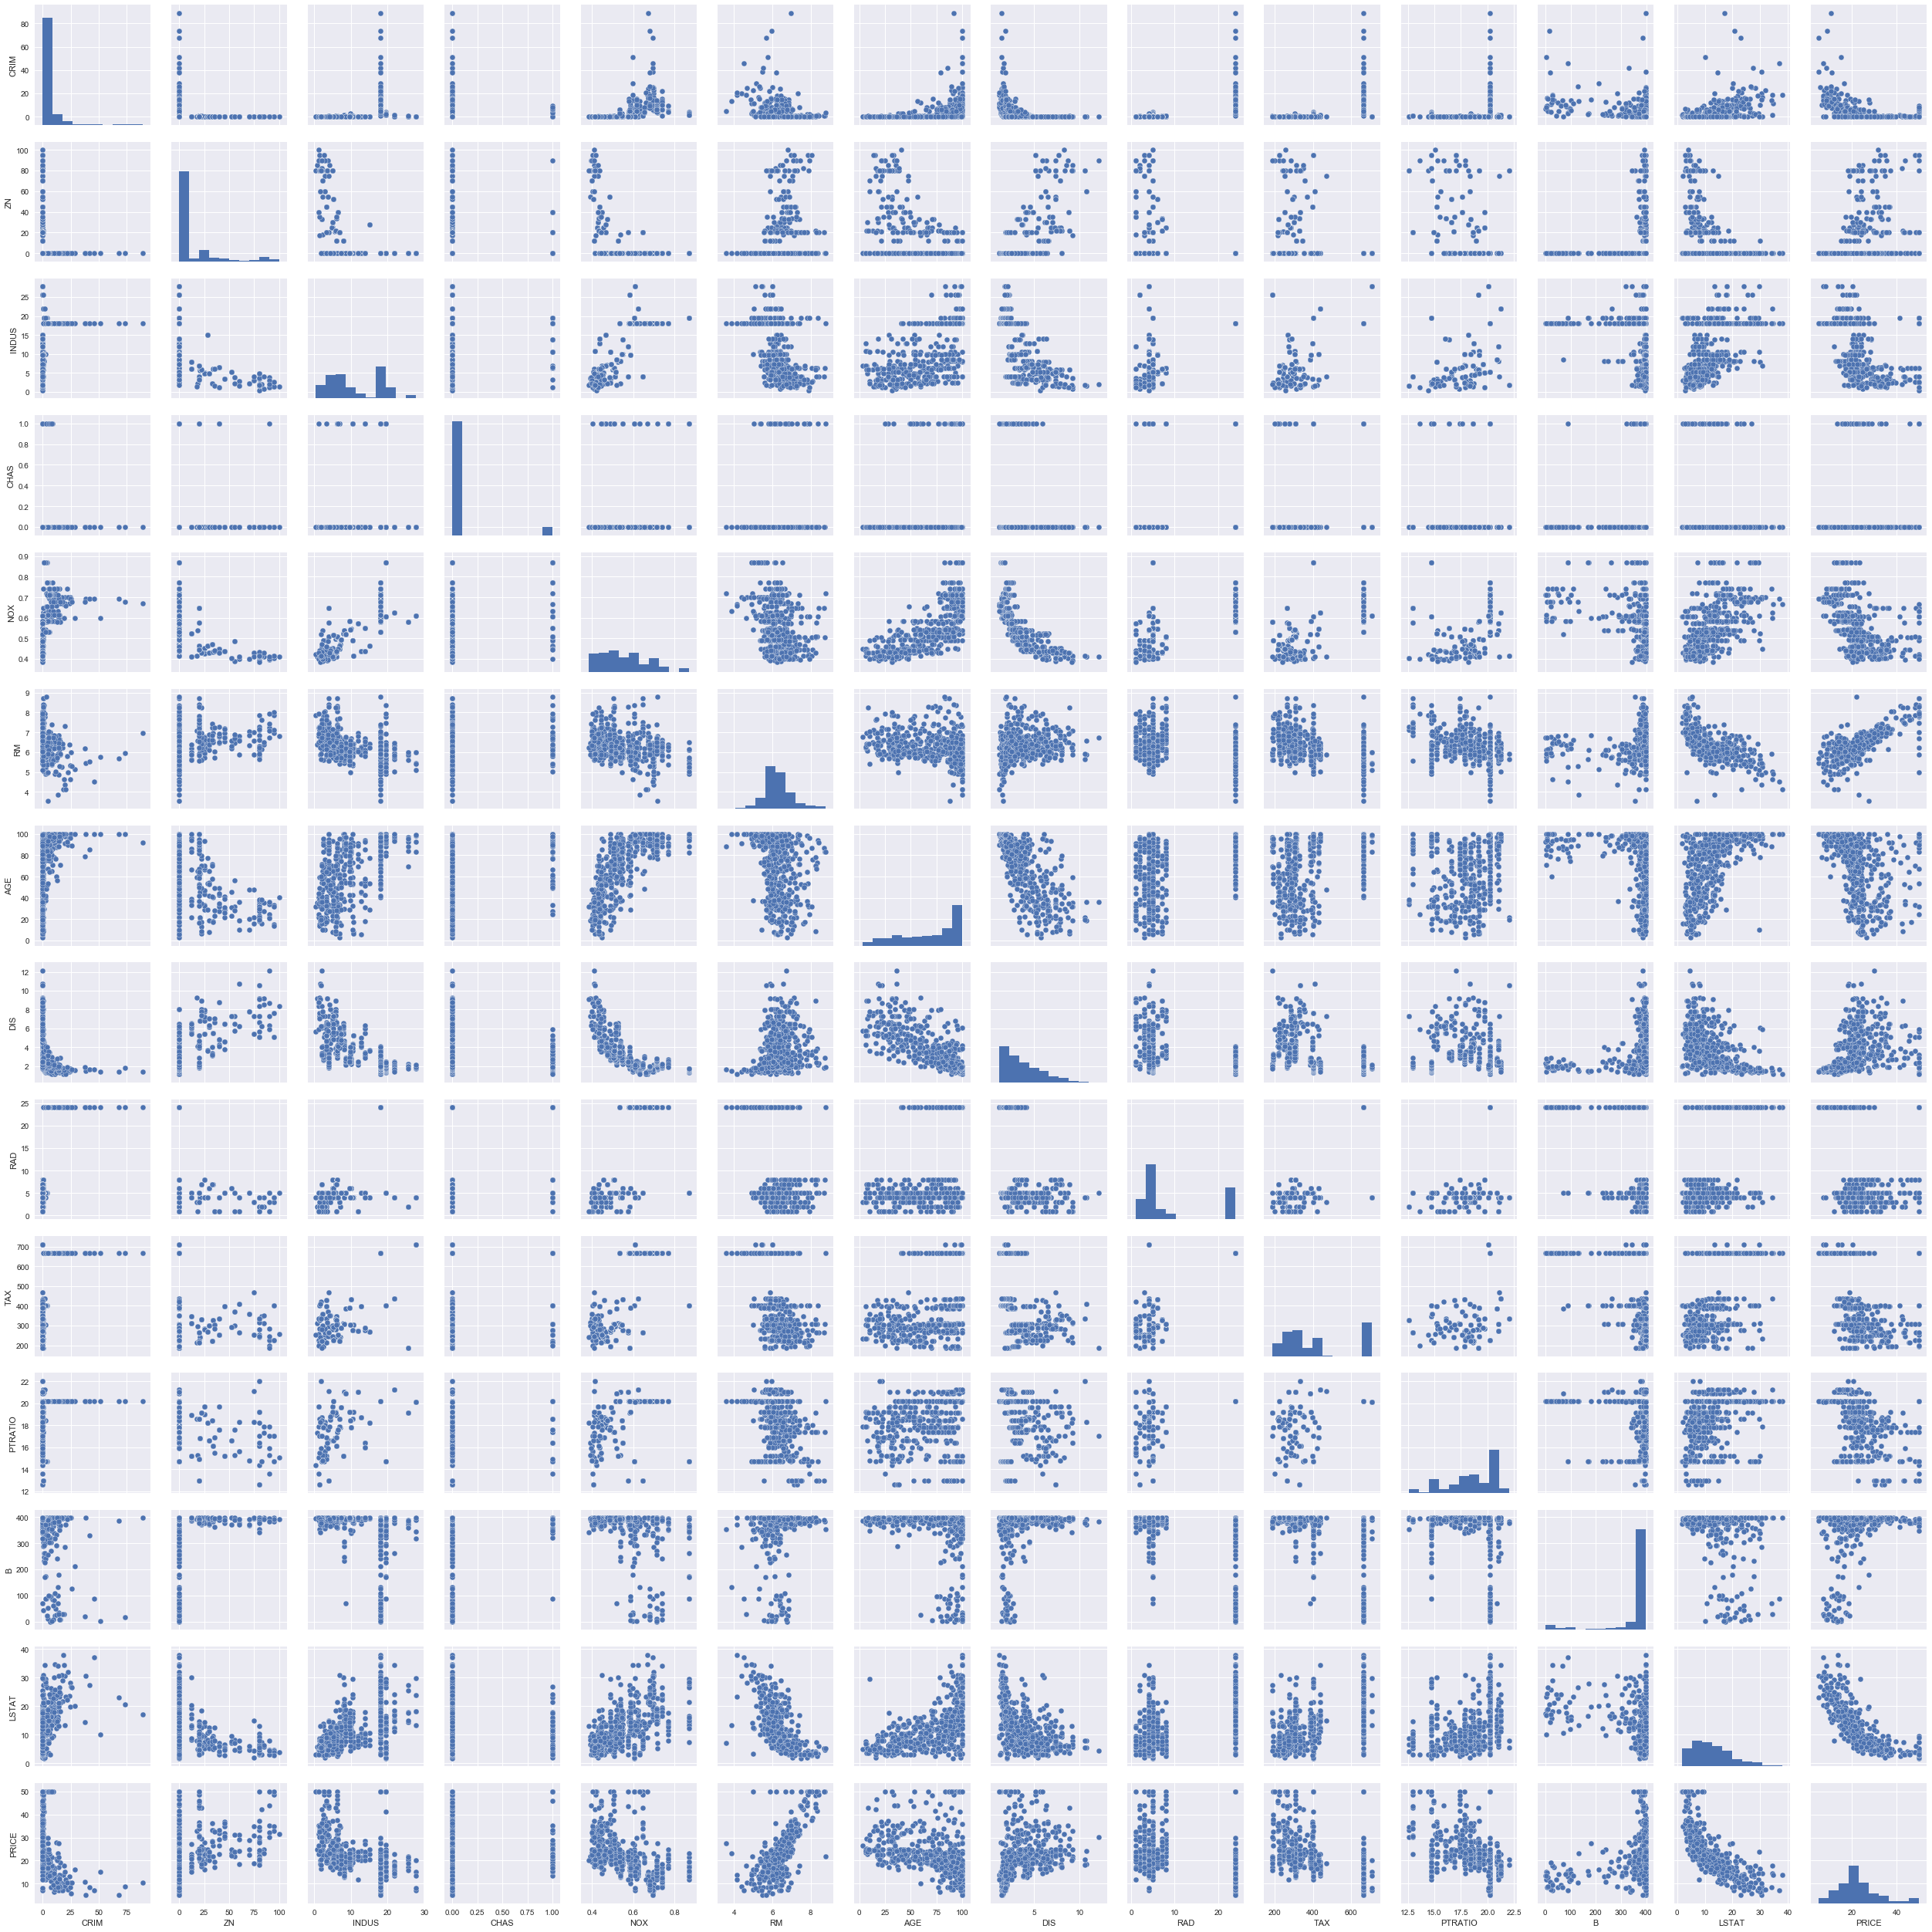

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_boston)
plt.show()

# 3. 資料標準化

匯入套件

In [2]:
from sklearn import preprocessing

In [3]:
X = df_boston.drop('PRICE',axis=1)
y = df_boston['PRICE']

### StandardScaler

In [4]:
standard = preprocessing.StandardScaler()
standard.fit(X)
X_s = standard.transform(X)

In [11]:
X_s

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
type(X_s)

numpy.ndarray

In [5]:
df_X_s = pd.DataFrame(X_s, columns=X.columns)
# df_X_s.columns = X.columns
df_X_s.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,1.974705e-18,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.177134e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.088961e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.885818e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,6.248255e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.941735e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


### MinMaxScaler

In [7]:
minmax = preprocessing.MinMaxScaler()
minmax.fit(X)
X_m = minmax.transform(X)

In [8]:
df_X_m = pd.DataFrame(X_m)
df_X_m.columns = X.columns
df_X_m.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040322,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096626,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.040925,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalizer

In [9]:
normal = preprocessing.Normalizer()
normal.fit(X)
X_n = normal.transform(X)

In [10]:
df_X_n = pd.DataFrame(X_n)
df_X_n.columns = X.columns
df_X_n.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.005041,0.022836,0.018804,0.000129,0.000989,0.011523,0.120675,0.007262,0.014939,0.691128,0.033339,0.657738,0.021937
std,0.011661,0.046848,0.010685,0.000482,0.000189,0.002681,0.048439,0.004588,0.010745,0.151663,0.005958,0.210475,0.011306
min,0.000013,0.000000,0.000963,0.000000,0.000660,0.004682,0.006431,0.001451,0.001730,0.425977,0.024088,0.000475,0.003099
25%,0.000162,0.000000,0.010674,0.000000,0.000872,0.009432,0.086124,0.003299,0.007927,0.575121,0.027274,0.507016,0.013636
50%,0.000496,0.000000,0.017226,0.000000,0.000969,0.011933,0.126160,0.006399,0.010076,0.652112,0.033398,0.744946,0.020261
75%,0.005143,0.024618,0.023876,0.000000,0.001052,0.013348,0.156600,0.010758,0.030635,0.850908,0.037980,0.805234,0.027900
max,0.113081,0.207644,0.061249,0.002371,0.002065,0.018156,0.237626,0.027624,0.035798,0.993395,0.053097,0.890610,0.070063


# 4. 預測模型 - 迴歸 Regression

Training & Testing data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X_s, y, test_size = 0.2)

### Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [10]:
lm.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(lm.intercept_)

22.60412823075997


In [16]:
print(lm.coef_)

[-0.87507864  0.96624021  0.13449982  0.4808284  -2.13799871  2.63533212
  0.0575893  -3.01637578  2.8546745  -2.09093721 -2.32915592  1.10870343
 -3.45578602]


In [17]:
pd.DataFrame(list(zip(X_train.columns,lm.coef_)),columns=['features','estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.875079
1,ZN,0.966240
2,INDUS,0.134500
3,CHAS,0.480828
4,NOX,-2.137999
5,RM,2.635332
6,AGE,0.057589
7,DIS,-3.016376
8,RAD,2.854675
9,TAX,-2.090937


In [18]:
y_predict = lm.predict(X_test)

In [19]:
pd.DataFrame(list(zip(y_test.values, y_predict)), columns=['Measured','Predicted']).head()

,Measured,Predicted
0,17.4,17.692978
1,18.6,18.650687
2,15.0,19.986216
3,25.0,27.759361
4,50.0,40.760334


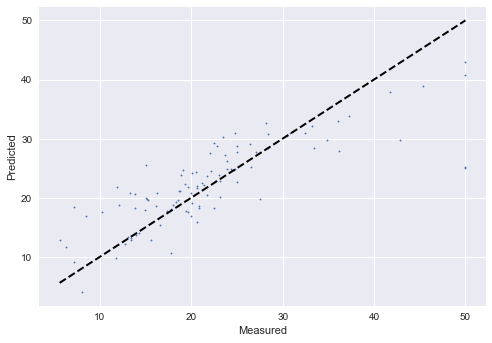

In [39]:
plt.scatter(y_test.values,y_predict,s=2)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'k--', lw=2)
plt.ylabel('Predicted')
plt.xlabel('Measured')
plt.show()

檢驗迴歸模型

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values, y_predict)
print("MSE : ",mse)

MSE :  31.24042930331929


In [48]:
R_2 = lm.score(X_train, y_train) 
print("R-squared  : ",R_2)

R-squared  :  0.7621033167015917


In [49]:
adj_R_2 = R_2 - (1 - R_2) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))
print("Adjusted R-squared : ",adj_R_2)

Adjusted R-squared :  0.7541734272583114


### Support Vector Regression

In [40]:
from sklearn.svm import SVR

In [41]:
svr = SVR(kernel='rbf')

In [42]:
svr.fit(X_train.values, y_train.values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_predict_svr = svr.predict(X_test)

In [44]:
pd.DataFrame(list(zip(y_test.values,y_predict_svr)), columns=['Measured','Predicted']).head()

,Measured,Predicted
0,17.4,18.538757
1,18.6,18.966123
2,15.0,20.292494
3,25.0,26.991776
4,50.0,34.248819


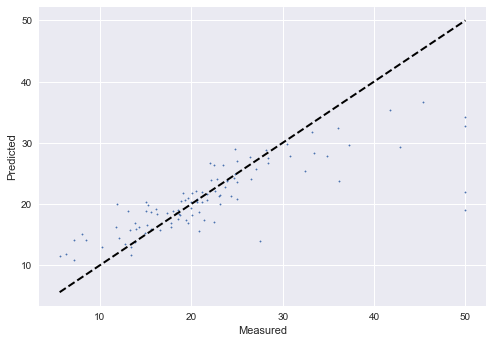

In [45]:
plt.scatter(y_test.values,y_predict_svr,s=2)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'k--', lw=2)
plt.ylabel('Predicted')
plt.xlabel('Measured')
plt.show()

In [50]:
mse = mean_squared_error(y_test.values, y_predict_svr)
print("MSE : ",mse)

MSE :  37.67430261218175


# 5. 預測模型 - 分群 Cluster

K-means

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 3)

In [13]:
iris = datasets.load_iris()
df_iris = pd.DataFrame( iris.data )
df_iris.columns = iris.feature_names
df_iris['species'] = iris.target_names[iris.target]

In [14]:
X = df_iris.drop("species",axis=1)
y = df_iris['species']

In [142]:
kmeans_fit = kmeans.fit(X)

In [143]:
kmeans_result = kmeans_fit.labels_

In [128]:
from sklearn.metrics import silhouette_score
print('Silhouette:',silhouette_score(X, kmeans_result))

Silhouette: 0.5525919445213676


In [129]:
y_c = y.astype('category').cat.codes
y_c = np.array(y_c)

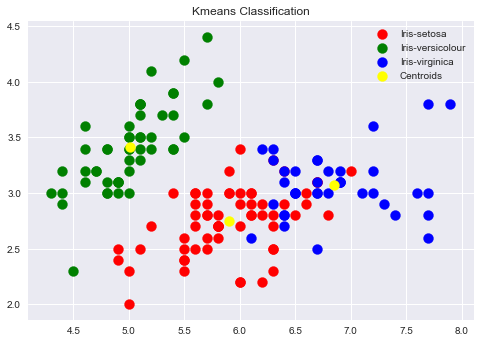

In [151]:
plt.scatter(X.values[kmeans_result == 0, 0], X.values[kmeans_result == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X.values[kmeans_result == 1, 0], X.values[kmeans_result == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X.values[kmeans_result == 2, 0], X.values[kmeans_result == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans_fit.cluster_centers_[:, 0], kmeans_fit.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title("Kmeans Classification")
plt.show()